# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd # Used for working with dataframes
import numpy as np # Used for numerical analysis
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
tweets_df = pd.read_csv('data/tweets1.csv') # Getting tweets data into tweets_df dataframe using pandas

In [3]:
tweets_df # Checking to see if all data has been imported

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
# The above module was run correctly and shows 31962 rows of data spread across 3 colums

In [5]:
tweets_df.info() # To show information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# Here we see that there are three columns named id, label and tweet
# We see that every column is filled so we don't have to fill in values
# TASK 1: Check and find what to do if data is missing

In [7]:
tweets_df.describe() # Used to describe the data in a dataframe

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [8]:
# The df.describe() function shows a basic the statistical analysis of the data

In [9]:
tweets_df['tweet'] # Used to show the tweets in the dataframe

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [10]:
# We don't have much use with the ID column
# It can cause further problems in analysis
# So we're going to drop it

tweets_df = tweets_df.drop(['id'], axis = 1) # axis = 1 denotes that the column has to be dropped and not the row

tweets_df # to display the dataframe and verify that the column has been dropped

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# UNDERSTANDING THE DATASET

<AxesSubplot:>

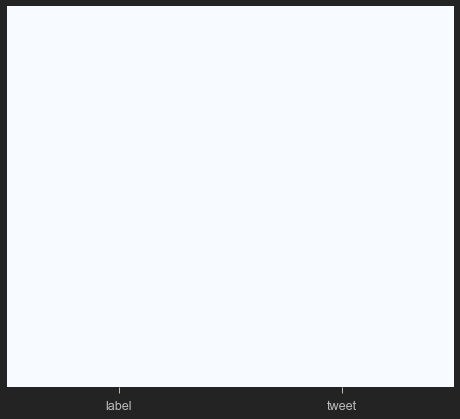

In [11]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
#This is to show if there are any null elements in the dataset 
# isnull() function checks for null elements

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

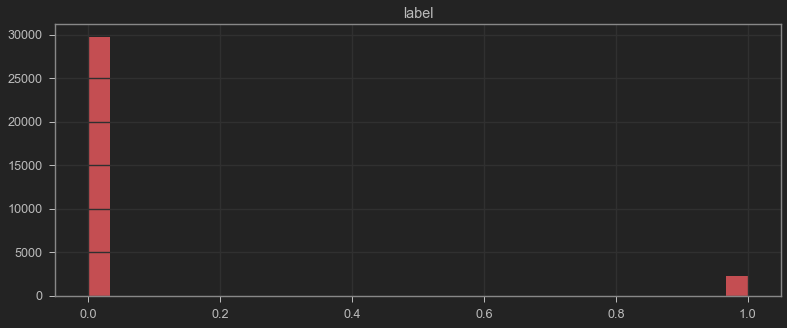

In [12]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')
# Plots a histogram of the dataset with color red

In [13]:
# The above diagram shows that this is an unbalanced dataset, and there are around 12 times the positive tweets as compared to the number of negative tweets
# Now we're gonna implement the same thing using seaborn countplot

/home/anandnair/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

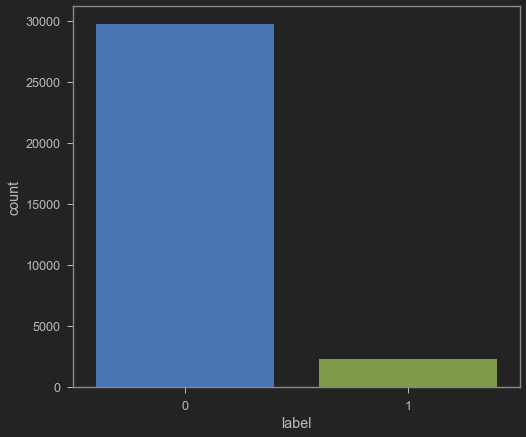

In [14]:
sns.countplot(tweets_df['label'], label = 'Count')

In [15]:
# From the above graph we get the same result as before. It is an unbalanced dataset and positive tweets are 12-15 times the negative tweets

In [16]:
# Now we can think of new features to add to the dataset
# The length of each tweet could be a good feature

tweets_df['length'] = tweets_df['tweet'].apply(len) # df.apply(func_name) applies the given function to each and every element in the given row

tweets_df # to see the dataset after adding length column

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

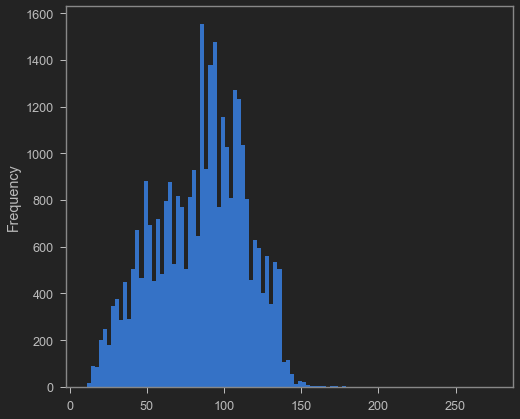

In [17]:
tweets_df['length'].plot(bins=100, kind='hist') # Just plotting to see the length of tweets

In [18]:
# Since we have added a new column to the tweets dataframe, let us analyse it again using df.describe()
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [19]:
# Using describe() again gives us knowledge on the statistical quatities related to the length of each tweet

In [20]:
# Let us try to display the tweet with minimum average and maximum lengths

print("Min Length: {}".format(tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]))
print('\n')
print("Max Length: {}".format(tweets_df[tweets_df['length'] == 274]['tweet'].iloc[0]))
print('\n')
print("Average Length: {}".format(tweets_df[tweets_df['length'] == 85]['tweet'].iloc[0]))


Min Length: i love you 


Max Length:  @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ðððððððððððð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð±ð±ð¤ð¤ð±ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ðððððððâ¦


Average Length:  â #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex


In [21]:
positive_tweets = tweets_df[tweets_df['label'] == 0]
negative_tweets = tweets_df[tweets_df['label'] == 1]

In [22]:
positive_tweets

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [23]:
negative_tweets

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [24]:
# From  the above two modules we see the no of positive and negative tweets

# Plotting a Word Cloud
### A Word Could is to be plotted for each of the whole set, negative tweets and positive tweets

In [25]:
from wordcloud import WordCloud
# To import necessary package for plotting word clouds

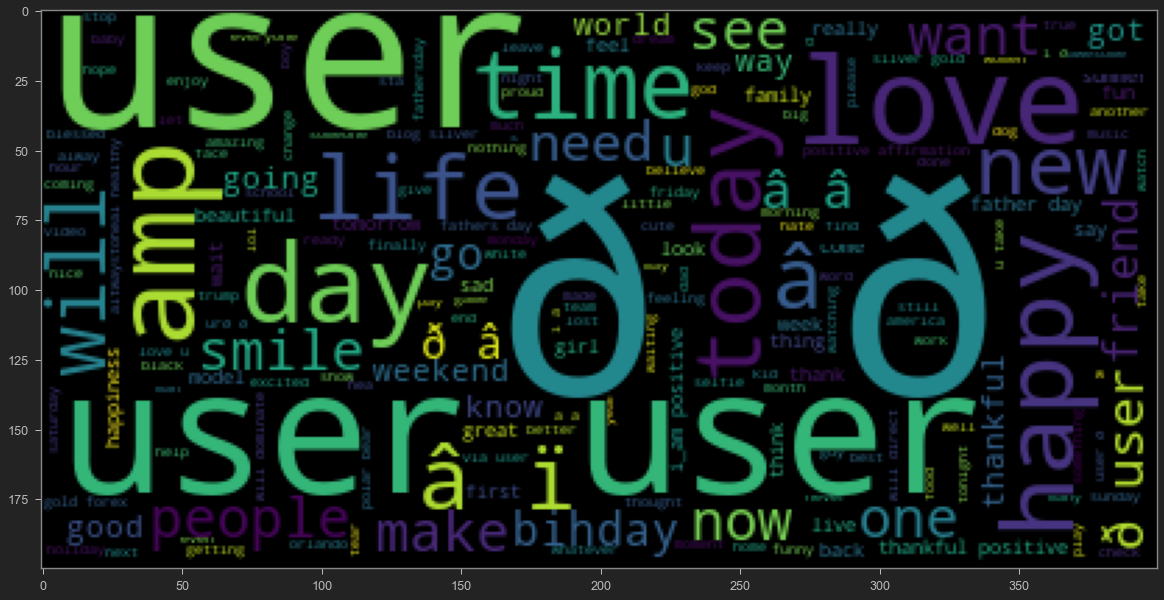

In [26]:
all_sentences = tweets_df['tweet'].tolist() # This function takes in the tweet column and converts it into a list of strings
all_sentences_as_a_string = " ".join(all_sentences) # Join all sentences into a single big string

plt.figure(figsize = (20,20)) # Setting the figure size
plt.imshow(WordCloud().generate(all_sentences_as_a_string)) # Plots a wordcloud

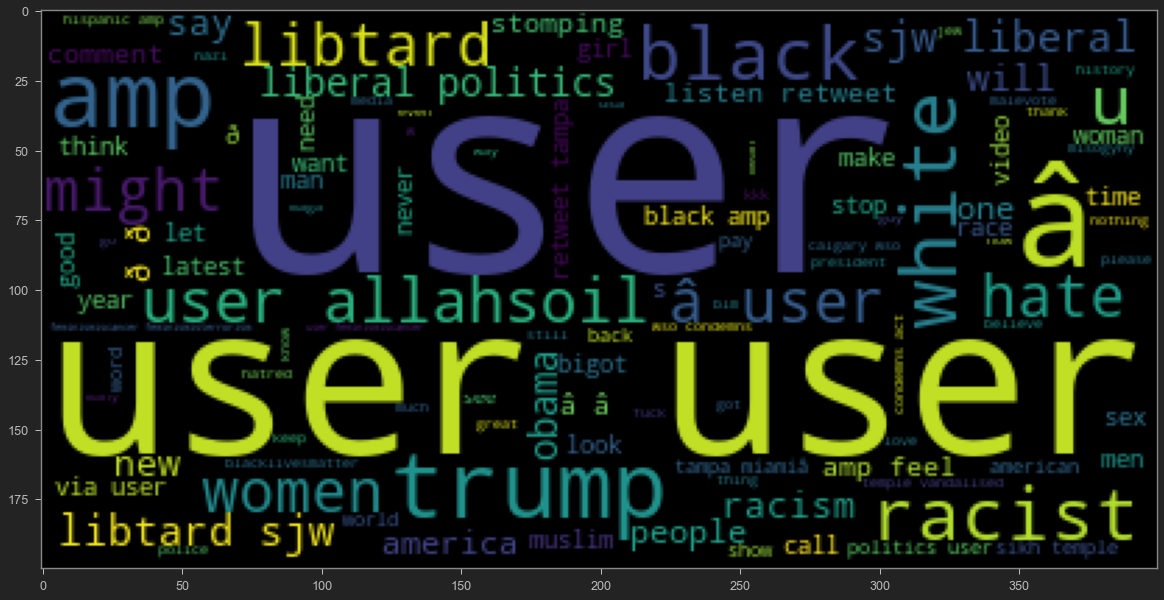

In [27]:
negative_tweets = tweets_df[tweets_df['label'] == 1] # Takes the dataset of only negative tweets
n_sentences = negative_tweets['tweet'].tolist() # This function takes in the tweet column and converts it into a list of strings
n_sentences_as_a_string = " ".join(n_sentences) # Join all sentences into a single big string

plt.figure(figsize = (20,20)) # Setting the figure size
plt.imshow(WordCloud().generate(n_sentences_as_a_string)) # Plots a wordcloud

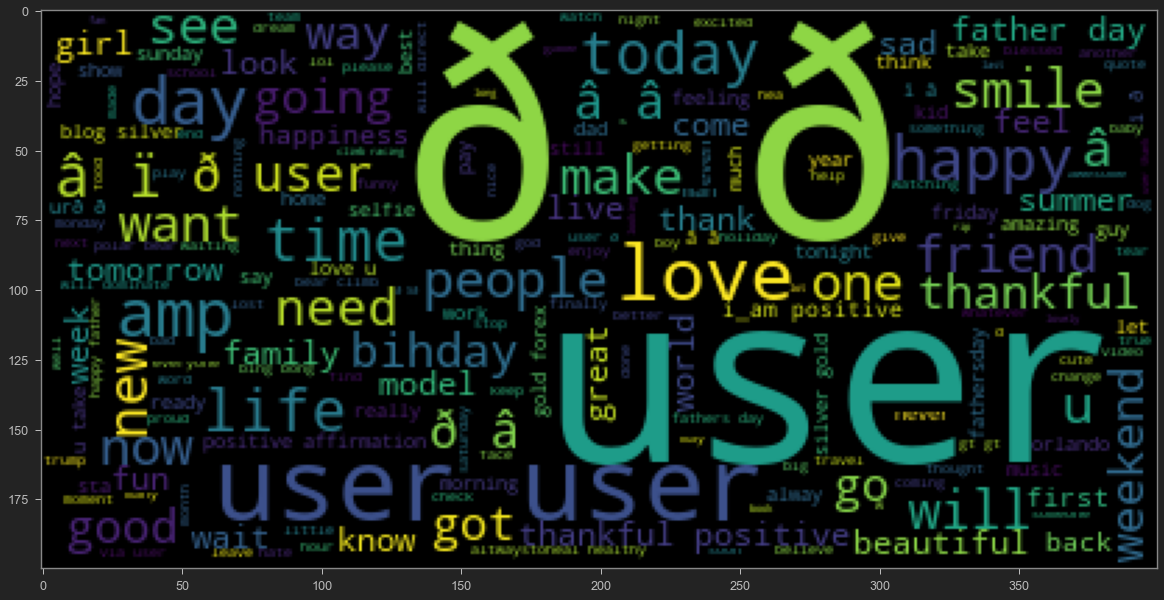

In [28]:
positive_tweets = tweets_df[tweets_df['label'] == 0] # Takes the dataset of only positive tweets
p_sentences = positive_tweets['tweet'].tolist() # This function takes in the tweet column and converts it into a list of strings
p_sentences_as_a_string = " ".join(p_sentences) # Join all sentences into a single big string

plt.figure(figsize = (20,20)) # Setting the figure size
plt.imshow(WordCloud().generate(p_sentences_as_a_string)) # Plots a wordcloud

In [29]:
# From the above wordclouds we can clearly see the difference between positive and negative tweets
# But there are a few words which don't mean much in either scenario and are mostly junk
# We'll clean the data now

# DATA CLEANING TEST SET 1
## REMOVING PUNCTUATION

In [30]:
import string # importing necessary libraries
# To use string.punctuation

In [31]:
string.punctuation # To list all punctuation elements

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
Test = 'Hey everybody! Hope you are having a great day today! I just love doing ML and AI projects!' # Initialising a test string with punctuation to check how to remove
Test

'Hey everybody! Hope you are having a great day today! I just love doing ML and AI projects!'

In [33]:
Test_punc_removed = [char for char in Test if char not in string.punctuation] # Using list comprehension to select only non-punctuation-characters
print(Test_punc_removed) # Displaying the list

['H', 'e', 'y', ' ', 'e', 'v', 'e', 'r', 'y', 'b', 'o', 'd', 'y', ' ', 'H', 'o', 'p', 'e', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'a', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'd', 'a', 'y', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'I', ' ', 'j', 'u', 's', 't', ' ', 'l', 'o', 'v', 'e', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 'M', 'L', ' ', 'a', 'n', 'd', ' ', 'A', 'I', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', 's']


In [34]:
Test_punc_removed_string = ''.join(Test_punc_removed) # Spaces are not removed in punctuation
Test_punc_removed_string

'Hey everybody Hope you are having a great day today I just love doing ML and AI projects'

# DATA CLEANING TEST SET 2
## REMOVING STOP WORDS
#### Stop Words are words that are really common and not really important

In [35]:
import nltk # Natural Language Toolkit
nltk.download('stopwords') # Downloading Stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anandnair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords
stopwords.words('english') # To display all stop words in English available in nltk library

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
Test_punc_removed_string_clean = [word for word in Test_punc_removed_string.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_string_clean # To display the list of words after removing stopwords

['Hey',
 'everybody',
 'Hope',
 'great',
 'day',
 'today',
 'love',
 'ML',
 'AI',
 'projects']

In [38]:
#Thus we have learnt how to remove punctuations and then remove stop words

# DATA CLEANING TEST SET 3
## Performing Count Vectorisation / Tokenisation

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
# Importing Count Vectorizer from scikit learn

In [40]:
SampleData = ['Hi there, My name is Anand! How you doing?', 'The most important thing here is data!', 'I love ML', 'Never have I ever', 'My name is Nived']

In [41]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(SampleData)

In [42]:
print(vectorizer.get_feature_names())

['anand', 'data', 'doing', 'ever', 'have', 'here', 'hi', 'how', 'important', 'is', 'love', 'ml', 'most', 'my', 'name', 'never', 'nived', 'the', 'there', 'thing', 'you']


In [43]:
print(counts.toarray())

[[1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1]
 [0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0]]


# FINAL DATA CLEANING
### To create a pipeline that does the above three things together
#### Removing Punctuations, Removing Stop Words, Tokenisation

In [44]:
def message_cleaning(message):
    message_punc_removed = [char for char in message if char not in string.punctuation]
    message_punc_removed_join = ''.join(message_punc_removed)
    message_clean = [word for word in message_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return message_clean

In [45]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [46]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [47]:
tweets_df_clean

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()

In [49]:
tweets_countvectorizer.shape

(31962, 47386)

In [50]:
X = tweets_countvectorizer

In [51]:
Y = tweets_df['label']